In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.7 MB/s eta 0:

In [3]:
import os
import sys
from datetime import datetime
import pickle

from pycaret.datasets import get_data
from pycaret.classification import *

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
clf = setup(data=df, target='target', train_size=0.8, session_id=10)

,Description,Value
0,Session id,10
1,Target,target
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(455, 31)"
6,Transformed test set shape,"(114, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [13]:
best3models = compare_models(sort='Accuracy', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9692,0.9891,0.9895,0.9624,0.9758,0.9336,0.9343,0.8450
lightgbm,Light Gradient Boosting Machine,0.9648,0.9852,0.9755,0.9687,0.9720,0.9247,0.9248,0.6800
rf,Random Forest Classifier,0.9626,0.9824,0.9719,0.9685,0.9702,0.9201,0.9201,1.0550
xgboost,Extreme Gradient Boosting,0.9539,0.9824,0.9650,0.9616,0.9631,0.9015,0.9020,0.1900
ridge,Ridge Classifier,0.9516,0.0000,0.9895,0.9369,0.9625,0.8946,0.8973,0.1350
qda,Quadratic Discriminant Analysis,0.9516,0.9888,0.9509,0.9714,0.9610,0.8974,0.8979,0.1600
lda,Linear Discriminant Analysis,0.9516,0.9804,0.9965,0.9312,0.9627,0.8941,0.8985,0.1700
ada,Ada Boost Classifier,0.9494,0.9851,0.9614,0.9580,0.9597,0.8919,0.8920,0.6650
gbc,Gradient Boosting Classifier,0.9473,0.9780,0.9579,0.9579,0.9579,0.8873,0.8873,0.9150
knn,K Neighbors Classifier,0.9451,0.9641,0.9754,0.9394,0.9570,0.8810,0.8824,0.1100


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [14]:
# 로지스틱 회귀 모델 생성
lr = create_model('lr', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9561,0.9847,0.9790,0.9524,0.9655,0.9053,0.9060
1,0.9339,0.9867,0.9577,0.9379,0.9477,0.8579,0.8583
Mean,0.9450,0.9857,0.9684,0.9452,0.9566,0.8816,0.8821
Std,0.0111,0.0010,0.0106,0.0072,0.0089,0.0237,0.0238


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
# 랜덤포레스트 모델 생성
rf = create_model('rf', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9890,0.9720,0.9720,0.9720,0.9250,0.9250
1,0.9604,0.9758,0.9718,0.9650,0.9684,0.9152,0.9152
Mean,0.9626,0.9824,0.9719,0.9685,0.9702,0.9201,0.9201
Std,0.0023,0.0066,0.0001,0.0035,0.0018,0.0049,0.0049


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
tuned_lr = tune_model(lr, fold=2, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9693,0.9810,0.9860,0.9658,0.9758,0.9339,0.9342
1,0.9295,0.9839,0.9437,0.9437,0.9437,0.8495,0.8495
Mean,0.9494,0.9825,0.9648,0.9547,0.9597,0.8917,0.8919
Std,0.0199,0.0015,0.0212,0.0110,0.0161,0.0422,0.0424


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [17]:
tuned_rf = tune_model(rf, fold=2, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9518,0.9853,0.9650,0.9583,0.9617,0.8966,0.8966
1,0.9559,0.9822,0.9789,0.9521,0.9653,0.9051,0.9057
Mean,0.9539,0.9838,0.9720,0.9552,0.9635,0.9008,0.9012
Std,0.0021,0.0015,0.0069,0.0031,0.0018,0.0042,0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


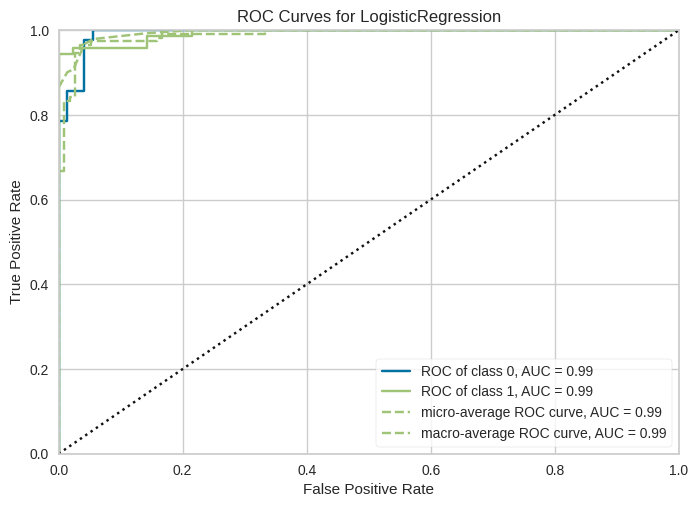

In [18]:
# ROC 커브
plot_model(tuned_lr, 'auc')

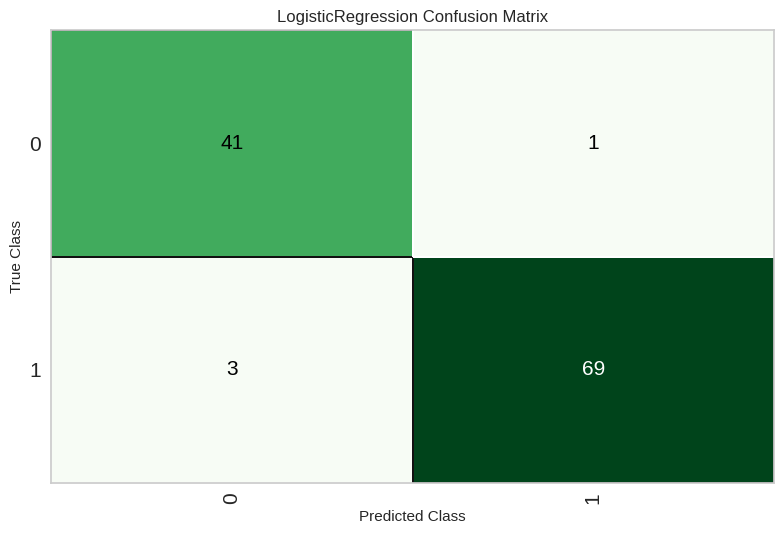

In [19]:
# 오차 행렬
plot_model(tuned_lr, 'confusion_matrix')

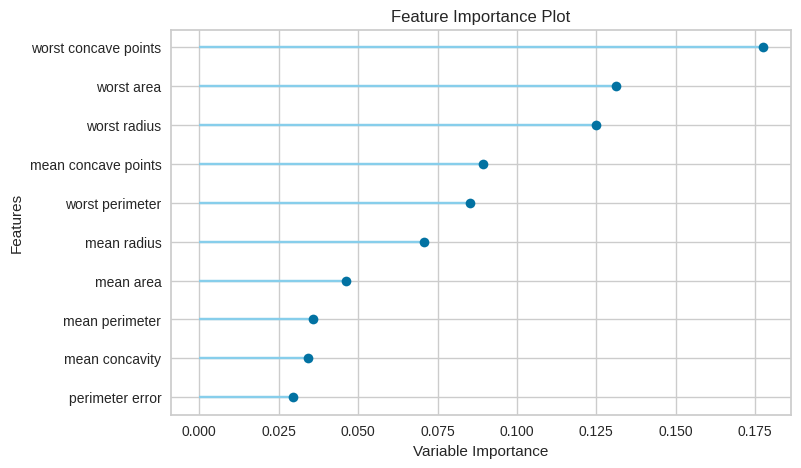

In [20]:
# 피처 중요도
plot_model(tuned_rf, 'feature')

In [21]:
blended = blend_models(estimator_list=best3models, fold=2, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9693,0.9898,0.9790,0.9722,0.9756,0.9342,0.9342
1,0.9648,0.9850,0.9789,0.9653,0.9720,0.9244,0.9246
Mean,0.9670,0.9874,0.9789,0.9688,0.9738,0.9293,0.9294
Std,0.0023,0.0024,0.0001,0.0035,0.0018,0.0049,0.0048


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [22]:
pred = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9912,1.0000,0.9861,1.0000,0.9930,0.9812,0.9814
